In [1]:
#SOURCE: https://victorzhou.com/blog/keras-cnn-tutorial/

In [1]:
!pip install mnist

In [2]:
import numpy as np
import mnist
from tensorflow import keras

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)

(60000, 28, 28)
(60000,)


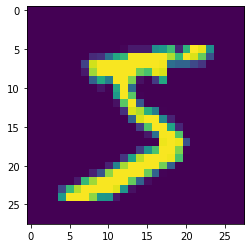

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

Preparing the Data

Before we begin, we’ll normalize the image pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values usually leads to better results). We’ll also reshape each image from (28, 28) to (28, 28, 1) because Keras requires the third dimension.

In [5]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
print(train_labels[0])

5


In [9]:
#One hot encoding

#Do it yourself!
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
#Or

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

2022-06-01 20:16:30.394920: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [11]:
#Automatic one hot encoding

from tensorflow.keras.utils import to_categorical

model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3340 - accuracy: 0.9032 - val_loss: 0.1969 - val_accuracy: 0.9409
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1641 - accuracy: 0.9524 - val_loss: 0.1290 - val_accuracy: 0.9618
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9642 - val_loss: 0.1061 - val_accuracy: 0.9688


In [13]:
#Save the model for later usage
model.save_weights('cnn.h5')

In [14]:
#Resuing the model by loading pre-trained model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

# Build the model.
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('cnn.h5')

[2 2 9 3 9]
[7 2 1 0 4]


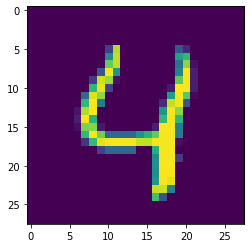

In [21]:
# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])
plt.imshow(test_images[4])
# print(predictions)
# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Network Depth

What happens if we add or remove Convolutional layers? How does that affect training and/or the model’s final performance?

In [22]:
model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  Conv2D(num_filters, filter_size),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

Dropout

What if we tried adding Dropout layers, which are commonly used to prevent overfitting?

In [23]:
from tensorflow.keras.layers import Dropout

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Dropout(0.5),
  Flatten(),
  Dense(10, activation='softmax'),
])

Fully-connected Layers

What if we add fully-connected layers between the Convolutional outputs and the final Softmax layer? This is something commonly done in CNNs used for Computer Vision.

In [24]:
from tensorflow.keras.layers import Dense

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

Convolution Parameters

What if we play with the Conv2D parameters? For example:

In [25]:
# These can be changed, too!
num_filters = 8
filter_size = 3

model = Sequential([
  # See https://keras.io/layers/convolutional/#conv2d for more info.
  Conv2D(
    num_filters,
    filter_size,
    input_shape=(28, 28, 1),
    strides=2,
    padding='same',
    activation='relu',
  ),
  MaxPooling2D(pool_size=pool_size, strides=2,),
  Flatten(),
  Dense(10, activation='softmax'),
])